<a href="https://colab.research.google.com/github/Suryaprasadindra/research/blob/main/houseprice_sample_generating_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)  # for reproducibility

# Number of samples
n_samples = 10000

# Feature: Size (sq_ft), normally distributed around 1500 sq_ft with std deviation of 500 sq_ft
size = np.random.normal(1500, 500, n_samples).astype(int)

# Feature: Bedrooms, assuming 1-5 bedrooms, uniformly distributed
bedrooms = np.random.randint(1, 6, n_samples)

# Feature: Age of the house, normally distributed around 20 years with std deviation of 15 years
age = np.abs(np.random.normal(20, 15, n_samples)).astype(int)  # absolute to avoid negative ages

# Feature: Bathrooms, assuming 1-4 bathrooms, uniformly distributed
bathrooms = np.random.randint(1, 5, n_samples)

# Feature: Location Type
location_types = ["Urban", "Suburban", "Rural"]
location = np.random.choice(location_types, n_samples)

# Feature: Economic Condition
economic_conditions = ["Low", "Medium", "High"]
economic_condition = np.random.choice(economic_conditions, n_samples)

# Generating Price based on the features with random noise
base_price = 100  # base price in thousands of dollars
price = (base_price + (size * 0.1) + (bedrooms * 10) - (age * 2) + (bathrooms * 5) +
         np.random.normal(0, 25, n_samples))  # Random noise
# Adjust price based on location and economic condition
price *= np.where(location == "Urban", 1.1, 1)
price *= np.where(location == "Suburban", 1.05, 1)
price *= np.where(location == "Rural", 0.9, 1)
price *= np.where(economic_condition == "High", 1.2, 1)
price *= np.where(economic_condition == "Medium", 1.1, 1)
price *= np.where(economic_condition == "Low", 0.8, 1)

# Create DataFrame
data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Age': age,
    'Bathrooms': bathrooms,
    'Location Type': location,
    'Economic Condition': economic_condition,
    'Price': price
})

# Display the first few rows of the dataset
print(data.head())




   Size  Bedrooms  Age  Bathrooms Location Type Economic Condition       Price
0  2382         5    9          2         Urban                Low  323.521609
1  1700         1   27          1         Rural               High  293.909378
2  1989         5   16          1      Suburban                Low  286.181063
3  2620         2    5          2      Suburban             Medium  404.542485
4  2433         4   22          3      Suburban             Medium  438.664799


In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate the features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Define the categorical columns and the numerical columns
categorical_cols = ['Location Type', 'Economic Condition']
numerical_cols = ['Size', 'Bedrooms', 'Age', 'Bathrooms']

# Create a Column Transformer to apply different preprocessing to categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical columns
    ])

# Create a preprocessing pipeline that applies the transformer
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data and transform the test data (if split)
X_preprocessed = pipeline.fit_transform(X)

# Convert the processed features back into a DataFrame (optional, for verification)
# Extracting feature names for the transformed columns after one-hot encoding
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()
transformed_cols = list(numerical_cols) + list(ohe_feature_names)

# Create the new DataFrame from the array returned by the ColumnTransformer
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=transformed_cols)

# Display the first few rows of the processed DataFrame
print(X_preprocessed_df.head())


       Size  Bedrooms       Age  Bathrooms  Location Type_Suburban  \
0  1.805899  1.392111 -0.901484  -0.466453                     0.0   
1  0.424717 -1.431071  0.464056  -1.359700                     0.0   
2  1.009998  1.392111 -0.370440  -1.359700                     1.0   
3  2.287895 -0.725275 -1.204937  -0.466453                     1.0   
4  1.909184  0.686316  0.084739   0.426793                     1.0   

   Location Type_Urban  Economic Condition_Low  Economic Condition_Medium  
0                  1.0                     1.0                        0.0  
1                  0.0                     0.0                        0.0  
2                  0.0                     1.0                        0.0  
3                  0.0                     0.0                        1.0  
4                  0.0                     0.0                        1.0  


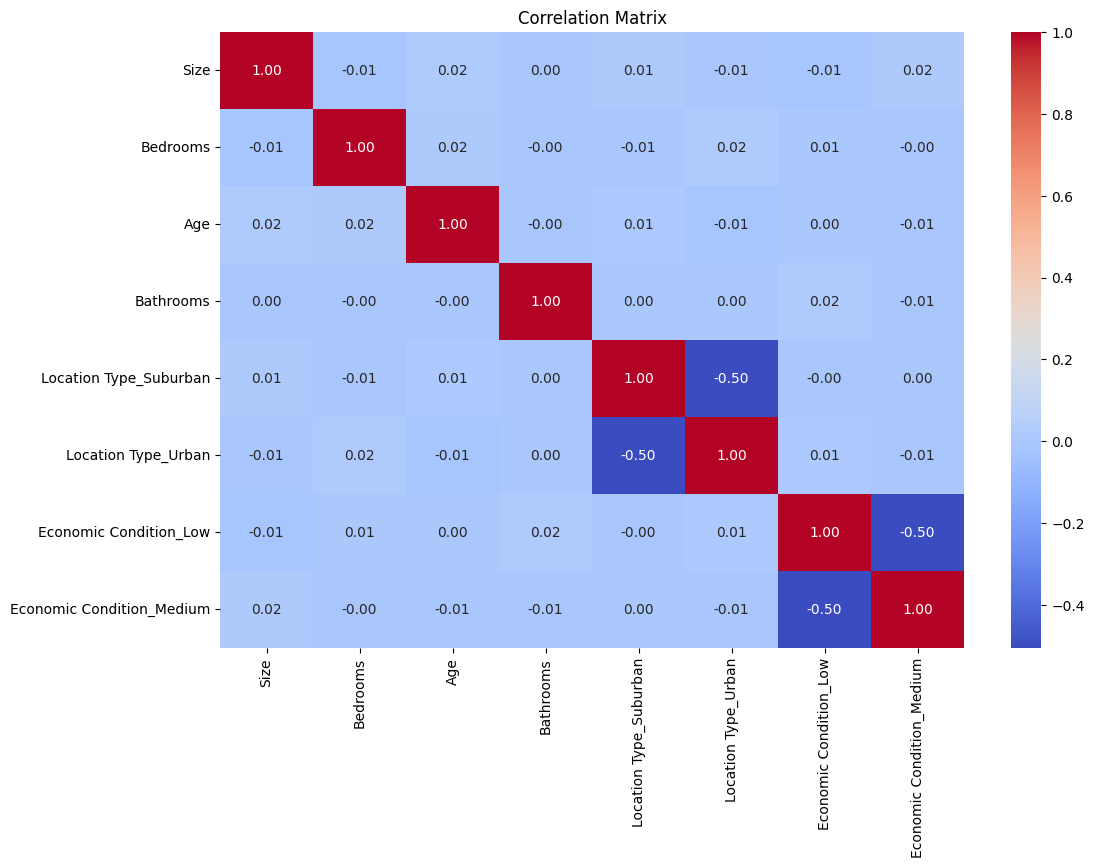

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_preprocessed_df is your DataFrame from previous steps
# For illustration, we'll use the synthetic data CSV loaded into a DataFrame

# Calculate the correlation matrix
corr_matrix = X_preprocessed_df.corr()

# Plot the correlation matrix for visualization (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify columns that are highly correlated
threshold = 0.8  # setting our threshold to 0.8
above_threshold_vars = {}
for col in corr_matrix:
    above_threshold_vars[col] = list(corr_matrix.index[corr_matrix[col] > threshold])

# Tracking columns to remove (avoiding self-correlation)
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

for key, values in above_threshold_vars.items():
    cols_seen.append(key)
    for x in values:
        if x == key:
            continue
        if x not in cols_seen:
            cols_to_remove.append(x)
            cols_to_remove_pair.append(key)

# Remove the columns from the DataFrame
X_preprocessed_df.drop(columns=cols_to_remove, inplace=True)



In [12]:
# Remove the columns from the DataFrame
X_preprocessed_df

,Size,Bedrooms,Age,Bathrooms,Location Type_Suburban,Location Type_Urban,Economic Condition_Low,Economic Condition_Medium
0,1.805899,1.392111,-0.901484,-0.466453,0.0,1.0,1.0,0.0
1,0.424717,-1.431071,0.464056,-1.359700,0.0,0.0,0.0,0.0
2,1.009998,1.392111,-0.370440,-1.359700,1.0,0.0,1.0,0.0
3,2.287895,-0.725275,-1.204937,-0.466453,1.0,0.0,0.0,1.0
4,1.909184,0.686316,0.084739,0.426793,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9995,-1.813122,1.392111,-1.129073,0.426793,0.0,1.0,0.0,0.0
9996,0.062207,-1.431071,0.236466,0.426793,0.0,1.0,0.0,1.0
9997,0.542178,-0.019480,-1.508390,1.320039,0.0,1.0,0.0,1.0
9998,-0.014750,-0.019480,-1.584253,1.320039,0.0,0.0,1.0,0.0


In [14]:
X = X_preprocessed_df
X.head()

,Size,Bedrooms,Age,Bathrooms,Location Type_Suburban,Location Type_Urban,Economic Condition_Low,Economic Condition_Medium
0,1.805899,1.392111,-0.901484,-0.466453,0.0,1.0,1.0,0.0
1,0.424717,-1.431071,0.464056,-1.359700,0.0,0.0,0.0,0.0
2,1.009998,1.392111,-0.370440,-1.359700,1.0,0.0,1.0,0.0
3,2.287895,-0.725275,-1.204937,-0.466453,1.0,0.0,0.0,1.0
4,1.909184,0.686316,0.084739,0.426793,1.0,0.0,0.0,1.0


Training Accuracy (R²): 0.90
Testing Accuracy (R²): 0.89
Mean Squared Error (MSE): 775.02
Root Mean Squared Error (RMSE): 27.84
Mean Absolute Error (MAE): 21.81
Mean Absolute Percentage Error (MAPE): 0.0925


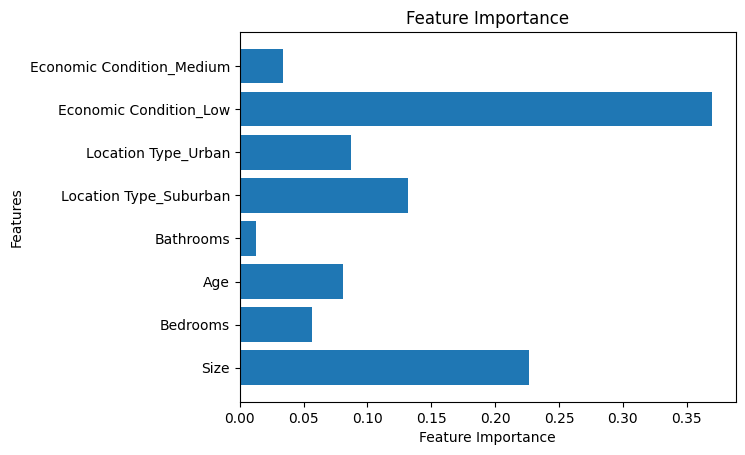

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your features and target variable from the loaded dataset
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Training and Testing R² scores
training_accuracy = r2_score(y_train, y_train_pred)
testing_accuracy = r2_score(y_test, y_test_pred)
print(f'Training Accuracy (R²): {training_accuracy:.2f}')
print(f'Testing Accuracy (R²): {testing_accuracy:.2f}')

# Mean Squared Error and Root Mean Squared Error for the test set
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}')

# Feature Importance Visualization
feature_importances = xgb_regressor.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


k means

In [17]:
X

,Size,Bedrooms,Age,Bathrooms,Location Type_Suburban,Location Type_Urban,Economic Condition_Low,Economic Condition_Medium
0,1.805899,1.392111,-0.901484,-0.466453,0.0,1.0,1.0,0.0
1,0.424717,-1.431071,0.464056,-1.359700,0.0,0.0,0.0,0.0
2,1.009998,1.392111,-0.370440,-1.359700,1.0,0.0,1.0,0.0
3,2.287895,-0.725275,-1.204937,-0.466453,1.0,0.0,0.0,1.0
4,1.909184,0.686316,0.084739,0.426793,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
9995,-1.813122,1.392111,-1.129073,0.426793,0.0,1.0,0.0,0.0
9996,0.062207,-1.431071,0.236466,0.426793,0.0,1.0,0.0,1.0
9997,0.542178,-0.019480,-1.508390,1.320039,0.0,1.0,0.0,1.0
9998,-0.014750,-0.019480,-1.584253,1.320039,0.0,0.0,1.0,0.0


In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'X' and 'y' are your features and target variable from the loaded dataset

# Step 1: Apply K-means clustering
num_clusters = 2  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Step 2: Create training and testing datasets
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

for i in range(num_clusters):
    X_cluster = X[clusters == i]
    y_cluster = y[clusters == i]
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

# Combine the cluster splits into single training and testing sets
X_train = pd.concat(X_train_list)
y_train = pd.concat(y_train_list)
X_test = pd.concat(X_test_list)
y_test = pd.concat(y_test_list)

# Step 3: Apply XGBoost
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Step 4: Calculate Metrics
training_accuracy = r2_score(y_train, y_train_pred)
testing_accuracy = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)  # Calculating Mean Absolute Error

# Print the results
print(f'Training Accuracy (R²): {training_accuracy:.2f}')
print(f'Testing Accuracy (R²): {testing_accuracy:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')  # Displaying the Mean Absolute Error


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training Accuracy (R²): 0.90
Testing Accuracy (R²): 0.89
Mean Squared Error (MSE): 763.15
Root Mean Squared Error (RMSE): 27.63
Mean Absolute Percentage Error (MAPE): 0.0917
Mean Absolute Error (MAE): 21.57


Training Accuracy (R²): 0.90
Testing Accuracy (R²): 0.89
Mean Squared Error (MSE): 775.02
Root Mean Squared Error (RMSE): 27.84
Mean Absolute Error (MAE): 21.81
Mean Absolute Percentage Error (MAPE): 0.0925